In [5]:
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
ns = [10, 20, 30, 40, 50, 100]
seeds = ["42", "42", "42", "42", "42", "01630"]

In [8]:
alphas, lbs, ubs, opt_alphas, opt_sigmas = [], [], [], [], [] 
for n in ns:
    alphas.append(np.load(f"../results/Ybmin_Powell_{n}searches_10nexps_100es_100ee_100ae/x0/best_alpha_pts.npy"))
    lbs.append(np.load(f"../results/Ybmin_Powell_{n}searches_10nexps_100es_100ee_100ae/x0/LB.npy"))
    ubs.append(np.load(f"../results/Ybmin_Powell_{n}searches_10nexps_100es_100ee_100ae/x0/UB.npy"))
    with open(f"../results/Ybmin_Powell_{n}searches_10nexps_100es_100ee_100ae/optimization_config.json") as file:
        opt_results = json.load(file)
    opt_alphas.append(opt_results["alpha_optimizer"])
    opt_sigmas.append(opt_results["sig_alpha_optimizer"])

In [39]:
def draw_point(x, y, lb, ub, opt_alp, opt_sig, col, lab):
    plt.scatter(x, y, s=30, color=col, label=lab)
    plt.scatter(opt_alp, y+1, s=30, color=col)
    plt.hlines(y, x-lb, x+ub, color=col)
    plt.hlines(y+1, opt_alp-opt_sig, opt_alp+opt_sig, color=col, ls="--")

def draw_set(alphas, lbs, ubs, opt_alphas, opt_sigmas, title, lab, lab_array):
    # some decoration
    colors = sns.color_palette("inferno", n_colors=len(alphas)).as_hex()
    # some ylabel stuff
    xticks = [None]
    for i, l in enumerate(lab_array):
        xticks.append("("+str(l)+f", {seeds[i]})")
    xticks.append(None)
    
    plt.figure(figsize=(6, 6*6/8))
    for i in range(len(alphas)):
        draw_point(alphas[i], (i+1)*3, lbs[i], ubs[i], opt_alphas[i], opt_sigmas[i], colors[i], lab+str(lab_array[i]))
    plt.title(title)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$n$")
    plt.yticks(np.arange(0,len(lab_array)*3+4,3), xticks)
    plt.savefig(f"{title}.png", dpi=1000, bbox_inches="tight")

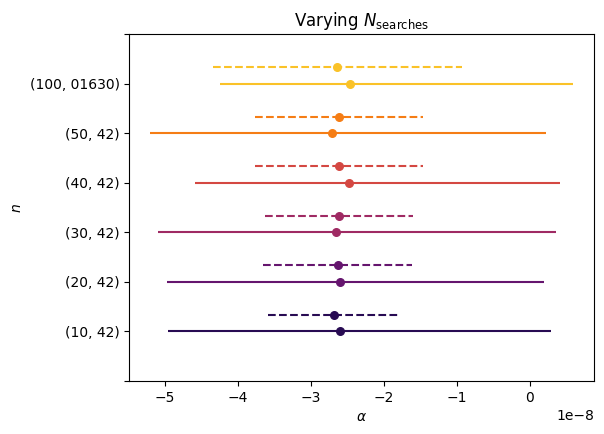

In [40]:
draw_set(alphas, lbs, ubs, opt_alphas, opt_sigmas, r"Varying $N_{\rm searches}$", \
         r"$n=$", ns)

In [50]:
alphas, lbs, ubs = [], [], [] 
for n in ns:
    alphas.append(np.load(f"../results/Ybmin_Powell_10searches_{n}nexps_100es_100ee_100ae/x0/best_alpha_pts.npy"))
    lbs.append(np.load(f"../results/Ybmin_Powell_10searches_{n}nexps_100es_100ee_100ae/x0/LB.npy"))
    ubs.append(np.load(f"../results/Ybmin_Powell_10searches_{n}nexps_100es_100ee_100ae/x0/UB.npy"))
    with open(f"../results/Ybmin_Powell_10searches_{n}nexps_100es_100ee_100ae/optimization_config.json") as file:
        opt_results = json.load(file)
    opt_alphas.append(opt_results["alpha_optimizer"])
    opt_sigmas.append(opt_results["sig_alpha_optimizer"])

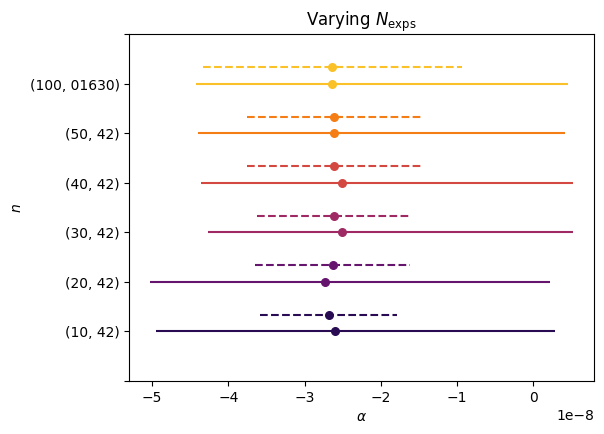

In [51]:
draw_set(alphas, lbs, ubs, opt_alphas, opt_sigmas, r"Varying $N_{\rm exps}$", \
         r"$n=$", ns)

In [44]:
nes = [100, 200, 300, 400, 500, 5000]
seeds = ["42", "42", "42", "42", "42", "01630"]

In [45]:
alphas, lbs, ubs = [], [], [] 
for n in nes:
    alphas.append(np.load(f"../results/Ybmin_Powell_10searches_10nexps_100es_100ee_{n}ae/x0/best_alpha_pts.npy"))
    lbs.append(np.load(f"../results/Ybmin_Powell_10searches_10nexps_100es_100ee_{n}ae/x0/LB.npy"))
    ubs.append(np.load(f"../results/Ybmin_Powell_10searches_10nexps_100es_100ee_{n}ae/x0/UB.npy"))
    with open(f"../results/Ybmin_Powell_10searches_10nexps_100es_100ee_{n}ae/optimization_config.json") as file:
        opt_results = json.load(file)
    opt_alphas.append(opt_results["alpha_optimizer"])
    opt_sigmas.append(opt_results["sig_alpha_optimizer"])

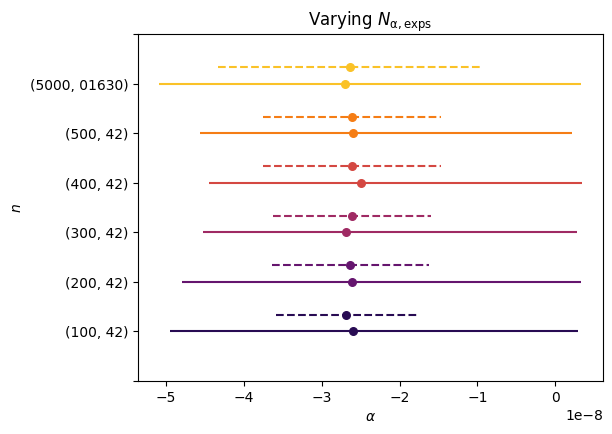

In [48]:
draw_set(alphas, lbs, ubs, opt_alphas, opt_sigmas, r"Varying $N_{\rm \alpha, exps}$", \
         r"$n=$", nes)

In [52]:
alphas, lbs, ubs = [], [], [] 
for n in nes:
    alphas.append(np.load(f"../results/Ybmin_Powell_10searches_10nexps_{n}es_{n}ee_100ae/x0/best_alpha_pts.npy"))
    lbs.append(np.load(f"../results/Ybmin_Powell_10searches_10nexps_{n}es_{n}ee_100ae/x0/LB.npy"))
    ubs.append(np.load(f"../results/Ybmin_Powell_10searches_10nexps_{n}es_{n}ee_100ae/x0/UB.npy"))
    with open(f"../results/Ybmin_Powell_10searches_10nexps_{n}es_{n}ee_100ae/optimization_config.json") as file:
        opt_results = json.load(file)
    opt_alphas.append(opt_results["alpha_optimizer"])
    opt_sigmas.append(opt_results["sig_alpha_optimizer"])

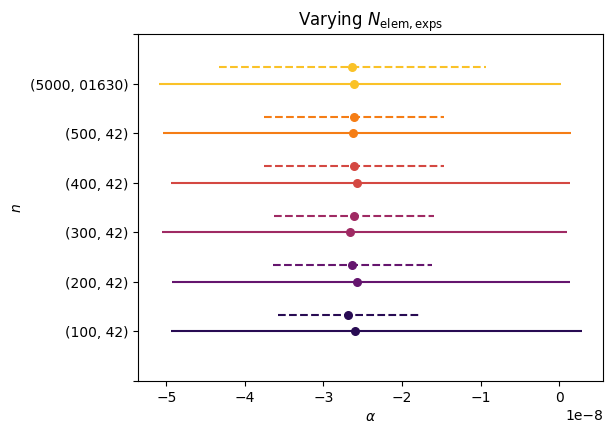

In [53]:
draw_set(alphas, lbs, ubs, opt_alphas, opt_sigmas, r"Varying $N_{\rm elem, exps}$", \
         r"$n=$", nes)

In [55]:
alphas, lbs, ubs = [], [], [] 
opts = ["Powell", "annealing", "differential_evolution"]
seeds = ["42", "27", "27"]
for o in opts:
    alphas.append(np.load(f"../results/Ybmin_{o}_10searches_100nexps_100es_100ee_100ae/x0/best_alpha_pts.npy"))
    lbs.append(np.load(f"../results/Ybmin_{o}_10searches_100nexps_100es_100ee_100ae/x0/LB.npy"))
    ubs.append(np.load(f"../results/Ybmin_{o}_10searches_100nexps_100es_100ee_100ae/x0/UB.npy"))
    with open(f"../results/Ybmin_{o}_10searches_100nexps_100es_100ee_100ae/optimization_config.json") as file:
        opt_results = json.load(file)
    opt_alphas.append(opt_results["alpha_optimizer"])
    opt_sigmas.append(opt_results["sig_alpha_optimizer"])

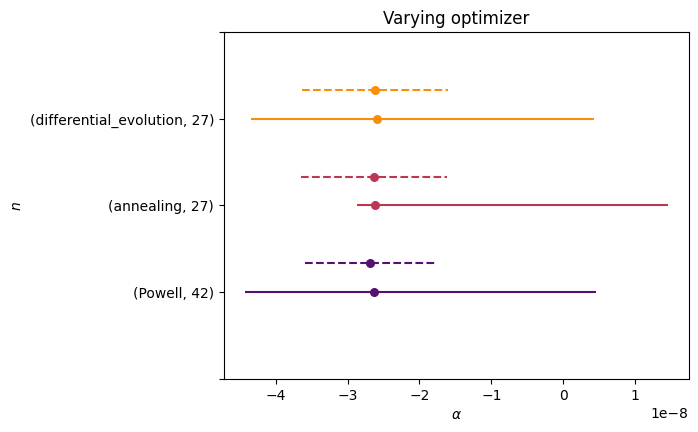

In [56]:
draw_set(alphas, lbs, ubs, opt_alphas, opt_sigmas, r"Varying optimizer", \
         r"opt: ", opts)